In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
import warnings
 
warnings.filterwarnings("ignore")
plt.rc('font', family='NanumBarunGothic')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd

In [ ]:
scr =  pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/SC/CARD_SPENDING_RESIDENT.txt', sep='\t',parse_dates = ['STD_DD'])
cj = pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/CJ/cj.xlsx', error_bad_lines=False, parse_dates=['DL_YMD'])
ska =  pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/SK/ska.csv', index_col='Unnamed: 0',parse_dates=['STD_YMD'])
covid = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/covid.csv', sep = ',',parse_dates=['기준일'])
gs = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/GS/GS.csv',  encoding='cp949',parse_dates=['OPER_DT'])

In [ ]:
scr=scr.query('GU_CD in [140,350]')
scr['STD_DD'] = pd.to_datetime(scr['STD_DD'])
scr_cnt = scr.groupby(['STD_DD'])['USE_CNT'].agg([('sc_cnt_sum','sum')]).reset_index()

scr_cnt2020 = scr_cnt[scr_cnt['STD_DD'] > '2020']

In [ ]:
cj=cj.query('CTPV_NM =="서울특별시"')
cj_cnt = cj.groupby(['DL_YMD'])['INVC_CONT'].agg([('cj_cnt_sum','sum')]).reset_index()

cj_cnt2020 = cj_cnt[cj_cnt['DL_YMD'] > '2020']

In [ ]:
ska['gu']=ska['HDONG_CD'].apply(lambda x : str(x)[0:2])
ska=ska.query('gu == "11"')
column_list = ska.columns[4:]
ska['all'] = ska[column_list].sum(axis=1)
ska2 = ska.loc[:,['STD_YMD','all']]
sk_cnt = ska2.groupby(['STD_YMD'])['all'].agg([('sk_cnt_sum','sum')]).reset_index()

sk_cnt2020 = sk_cnt[sk_cnt['STD_YMD'] > '2020']

In [ ]:
for i in np.arange(5,13,1):
  gs.iloc[:,i] = gs.iloc[:,i].str.replace('%','').astype(float)

In [ ]:
gs=gs.query('PVN =="서울특별시"')
gs_cnt = gs.loc[:,['OPER_DT','AMT_IND']].groupby(['OPER_DT'])['AMT_IND'].agg([('gs_cnt_sum','sum')]).reset_index()

gs_cnt2020 = gs_cnt[gs_cnt['OPER_DT'] > '2020']

In [ ]:
cv_cnt2020 = covid.iloc[0:3994,[0,2]]

In [ ]:
scr_cnt2020.columns = ['date','sc_cnt_sum']
cj_cnt2020.columns=['date','cj_cnt_sum']
sk_cnt2020.columns=['date','sk_cnt_sum']
gs_cnt2020.columns=['date','gs_cnt_sum']
cv_cnt2020.columns=['date','cv_cnt_sum']

In [ ]:
all = pd.merge(pd.merge(pd.merge(pd.merge(sk_cnt2020,scr_cnt2020,on='date'),cj_cnt2020,on='date'),gs_cnt2020,on='date'),cv_cnt2020,on='date')

In [ ]:
all.index = all['date']
del all['date']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

col,idx = all.columns,all.index

x = all.values
scaler = MinMaxScaler()
scaled_all = pd.DataFrame(scaler.fit_transform(x))

scaled_all.columns , scaled_all.index  = col,idx

In [ ]:
scaled_all7 = scaled_all.resample('W-Fri').mean()
#scaled_all7.index= [str(i+1) + '주차' for i in range(scaled_all7.shape[0])]
scaled_all7.index = ['2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4','4-5','5-1', '5-2', '5-3', '5-4','5-5']

In [ ]:
def plot(data): 
  colors = ['crimson', '#434343', '#666666', '#999999', '#b7b7b7']
  plt.figure(figsize = [20,6])
  plt.plot(data.iloc[:,0],color = colors[0],linewidth = 4)
  for i in range(4):
    plt.plot(data.iloc[:,i+1],color = colors[i+1],marker='o',markersize=4)
  plt.xticks(fontsize=13)
  plt.title('2020년 주차별 유동인구 & 기업 별 사용 건수 비교',fontsize=20)
  plt.legend(['유동인구','신한카드','CJ유통','GS리테일','확진자수'])
  plt.show()

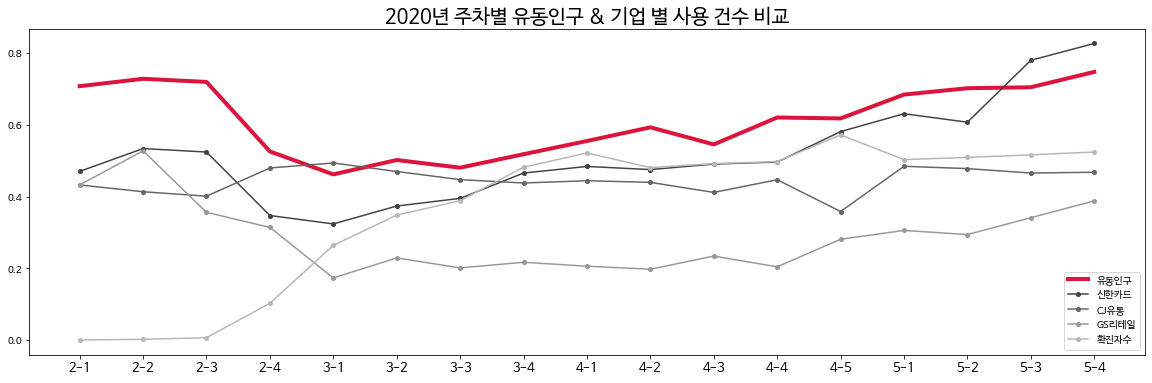

In [ ]:
plot(scaled_all7[:-1])

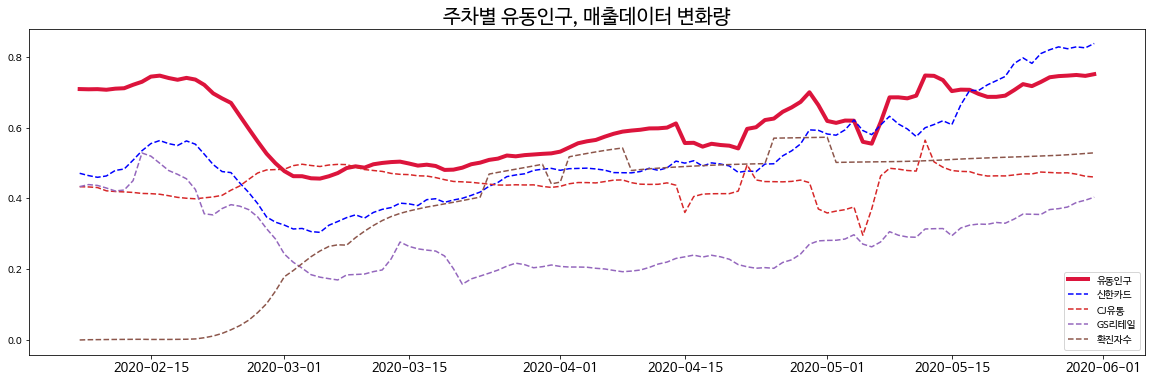

In [ ]:
scaled_all7mean = scaled_all.rolling(7).mean().dropna()
plot(scaled_all7mean)